In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import scipy.stats
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
import time
import imp
import spatialstatWUCCI.distribution_simulator as sswdistsim

path = '/Users/michaelshih/Documents/code/personal_project/Ripleys_K_function_test/'
os.chdir(path)


In [2]:
# load file
subfolder = 'output'
subfolder_type = 'csv'
filename = 'P_ThomasPP_20'
inputpath = os.path.join(path,subfolder, subfolder_type, filename + '.csv')
P_ThomasPP = pd.read_csv(inputpath)
P_ThomasPP = np.array(P_ThomasPP)

filename = 'P_PoissonPP_20'
inputpath = os.path.join(path,subfolder, subfolder_type, filename + '.csv')
P_PoissonPP = pd.read_csv(inputpath)
P_PoissonPP = np.array(P_PoissonPP)


In [3]:
# Ripley's K-function ----------------------------------
import imp
import spatialstatWUCCI.spatialpattern as spatialpattern
import spatialstatWUCCI.distribution_simulator as sswdistsim

In [4]:
# 1. ThomasPP ------------------------------------------
rmax = 5
Dx = 20
Dy = 20
xmin = 0 + rmax
xmax = Dx - rmax
ymin = 0 + rmax
ymax = Dx - rmax

print(P_ThomasPP)


[[9.83851182 3.82685342]
 [9.21226762 3.41909207]
 [9.60470338 4.15393052]
 ...
 [3.53133983 8.89616781]
 [3.66078525 8.33919646]
 [3.71713816 8.88132128]]


In [10]:
print(P_ThomasPP)

[[9.83851182 3.82685342]
 [9.21226762 3.41909207]
 [9.60470338 4.15393052]
 ...
 [3.53133983 8.89616781]
 [3.66078525 8.33919646]
 [3.71713816 8.88132128]]


In [6]:
P_ThomasPP_center = sswdistsim.xyroi_idx(P_ThomasPP, xmin, xmax, ymin, ymax)

In [7]:
# P_ThomasPP_center = sswdistsim.xyroi(P_ThomasPP, 0, 20, 0, 20)
P_ThomasPP_density = sswdistsim.xydensity(P_ThomasPP, Dx = Dx) [0]
print(P_ThomasPP_density)


4.7975


In [8]:
start = time.time()
K_r, L_r, H_r, RList, densitylist = spatialpattern.spest(input_array_ref = P_ThomasPP_center, 
                        input_array_all = P_ThomasPP,
                        function = 'all', 
                        density = P_ThomasPP_density, 
                        rstart = 0, rend = 5, rstep = 0.01)
end = time.time()
print(end - start)

print(RList)
print(K_r)
print(L_r)
print(H_r)
print(densitylist)


.09 4.1  4.11 4.12 4.13 4.14 4.15 4.16 4.17 4.18 4.19
 4.2  4.21 4.22 4.23 4.24 4.25 4.26 4.27 4.28 4.29 4.3  4.31 4.32 4.33
 4.34 4.35 4.36 4.37 4.38 4.39 4.4  4.41 4.42 4.43 4.44 4.45 4.46 4.47
 4.48 4.49 4.5  4.51 4.52 4.53 4.54 4.55 4.56 4.57 4.58 4.59 4.6  4.61
 4.62 4.63 4.64 4.65 4.66 4.67 4.68 4.69 4.7  4.71 4.72 4.73 4.74 4.75
 4.76 4.77 4.78 4.79 4.8  4.81 4.82 4.83 4.84 4.85 4.86 4.87 4.88 4.89
 4.9  4.91 4.92 4.93 4.94 4.95 4.96 4.97 4.98 4.99 5.  ]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.08394870e-04 5.08394870e-04 5.08394870e-04
 5.08394870e-04 1.01678974e-03 2.03357948e-03 2.03357948e-03
 2.54197435e-03 3.55876409e-03 3.55876409e-03 5.08394870e-03
 6.10073844e-03 6.60913331e-03 7.11752818e-03 8.13431792e-03
 8.13431792e-03 9.65950254e-03 1.11846871e-02 1.16930820e-02
 1.32182666e-02 1.37266615e-02 1.62686358e-02 1.77938205e-02
 1.93190051e-02 2.03357948e-02 2.23693743e-02 

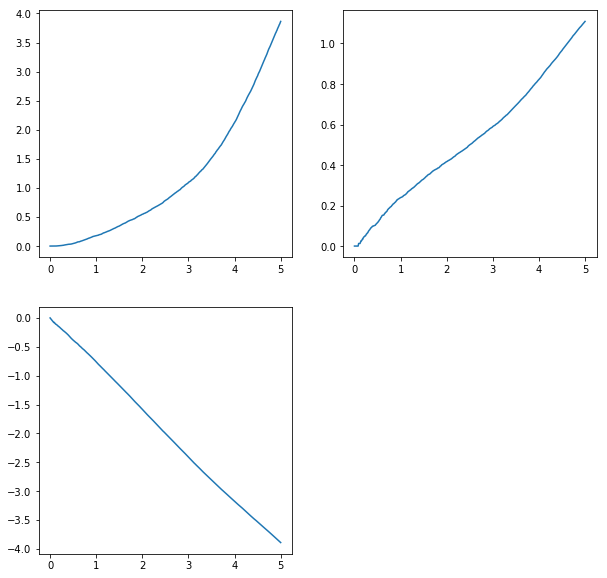

In [9]:
# plot
plt.figure(figsize= (10, 10))
plotsize_x = 20.0
plotsize_y = 20.0

plot_1 = plt.subplot(221)
plot_1.plot(RList, K_r)
plot_2 = plt.subplot(222)
plot_2.plot(RList, L_r)
plot_3 = plt.subplot(223)
plot_3.plot(RList, H_r)


